In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
N = 4       # number of walkers
Lx = 10
Ly = 20
stepSize = 0.5
r = np.zeros((N,2))
r[:,0] = np.random.random(N) * Lx
r[:,1] = np.random.random(N) * Ly
colors = []
for i in range(N):
    colors.append('#%06X' % np.random.randint(0, 0xFFFFFF))

In [47]:
tile_x_num = 10
tile_y_num = 20

tile_x_size = Lx / tile_x_num
tile_y_size = Ly / tile_y_num

tile_inds = np.zeros_like( r ,'int')

def walk(r):
    step = np.random.random(N) * 2.*np.pi
    dx = stepSize * np.cos(step)
    dy = stepSize * np.sin(step)
    r[:,0] += dx
    r[:,1] += dy
    passedRight = ((r[:,0]+dx) > Lx)
    passedLeft = ((r[:,0]+dx) < 0)
    passedTop = ((r[:,1]+dy) > Ly)
    passedBottom = ((r[:,1]+dy) < 0)
    r[passedRight,0] = 2.*Lx - dx[passedRight] - r[passedRight,0]
    r[passedLeft,0] = -dx[passedLeft] - r[passedLeft,0]
    r[passedTop,1] = 2.*Ly - dy[passedTop] - r[passedTop,1]
    r[passedBottom,1] = -dy[passedBottom] - r[passedBottom,1]
    #plt.scatter(r[:,0], r[:,1], c=colors, s=1.5)
    

def update_tile(tile_x_size, tile_y_size, r):
    tile_inds[:,0 ] = r[:, 0] / tile_x_size
    tile_inds[:,1 ] = r[:, 1] / tile_y_size
    #return np.array(  )
    

In [48]:
update_tile(tile_x_size, tile_y_size,r)

In [50]:
tMax = 100
step = np.zeros((N,2))
for t in range(tMax):
    walk(r)
    update_tile( tile_x_size, tile_y_size, r)
    #plt.scatter(r[:,0], r[:,1], c=colors, s=1.5)


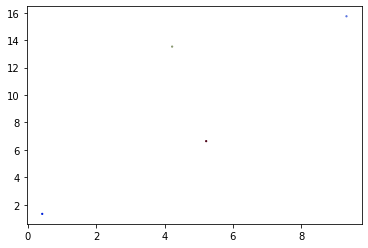

In [51]:
plt.scatter(r[:,0], r[:,1], c=colors, s=1.5)